<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/ReadMatDatafile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read MAT File from TROIKA Database with data including 1 ECG, 2 PPGs, and x,y,z accelarted signal 

In [1]:
import os

path = 'drive/Shareddrives/AIOT_LAB_DOCS/Data/'

In [2]:
pwd

'/content'

In [3]:
cd drive/Shareddrives/AIOT_LAB_DOCS/Data/

/content/drive/Shareddrives/AIOT_LAB_DOCS/Data


In [4]:
!ls

DATA_01_TYPE01_BPMtrace.mat  DATA_08_TYPE02_BPMtrace.mat  TrainSubj1
DATA_01_TYPE01.mat	     DATA_08_TYPE02.mat		  TrainSubj10
DATA_02_TYPE02_BPMtrace.mat  DATA_09_TYPE02_BPMtrace.mat  TrainSubj11
DATA_02_TYPE02.mat	     DATA_09_TYPE02.mat		  TrainSubj12
DATA_03_TYPE02_BPMtrace.mat  DATA_10_TYPE02_BPMtrace.mat  TrainSubj2
DATA_03_TYPE02.mat	     DATA_10_TYPE02.mat		  TrainSubj3
DATA_04_TYPE02_BPMtrace.mat  DATA_11_TYPE02_BPMtrace.mat  TrainSubj4
DATA_04_TYPE02.mat	     DATA_11_TYPE02.mat		  TrainSubj5
DATA_05_TYPE02_BPMtrace.mat  DATA_12_TYPE02_BPMtrace.mat  TrainSubj6
DATA_05_TYPE02.mat	     DATA_12_TYPE02.mat		  TrainSubj7
DATA_06_TYPE02_BPMtrace.mat  dataset.pickle		  TrainSubj8
DATA_06_TYPE02.mat	     my_first_model.png		  TrainSubj9
DATA_07_TYPE02_BPMtrace.mat  resultsS0.pickle
DATA_07_TYPE02.mat	     resultsS1.pickle


# Read mat file

In [15]:
import scipy.io as sio

mat = sio.loadmat('DATA_01_TYPE01.mat')
BPmat = sio.loadmat('DATA_01_TYPE01_BPMtrace.mat')
data = mat['sig']

In [6]:
import pandas as pd

df = pd.DataFrame(data)
df = df.T # Transpose data to column
df.head(7)
### The first row is ECG data
### The two next rows are PPG Data
### The last row is accerlerate data x , y , z
### Sampling rate is 125 Hz

,0,1,2,3,4,5
0,-269.5,-23.0,4.0,-0.0702,0.3432,0.9594
1,-267.5,-24.0,6.0,-0.0702,0.3588,0.9438
2,-267.5,-26.5,3.0,-0.0546,0.3666,0.9360
3,-265.5,-27.0,3.5,-0.0468,0.3666,0.9360
4,-262.0,-30.0,0.0,-0.0468,0.3744,0.9126
5,-268.5,-30.0,2.0,-0.0468,0.3900,0.9126
6,-275.5,-28.5,3.0,-0.0468,0.4056,0.9282


### Ploting ECG and PPGs 

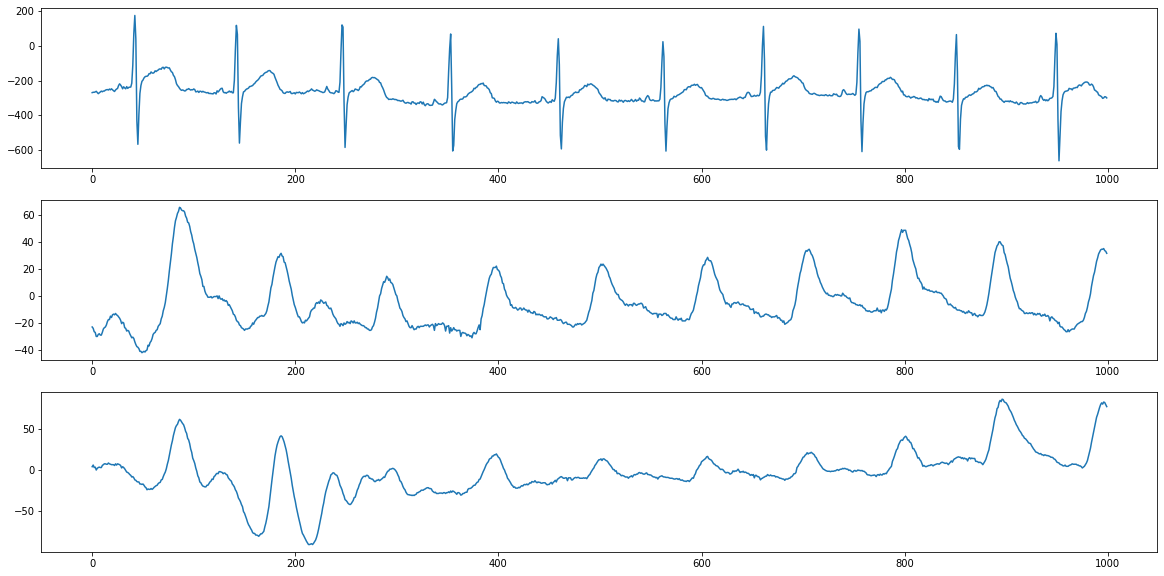

In [7]:
import matplotlib.pyplot as plt
L1, L2 = 0000, 1000
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(df[0][L1:L2])
plt.subplot(312)
plt.plot(df[1][L1:L2])
plt.subplot(313)
plt.plot(df[2][L1:L2])


### HR ploting for sample data

In [8]:
import numpy as np

HR = BPmat['BPM0']

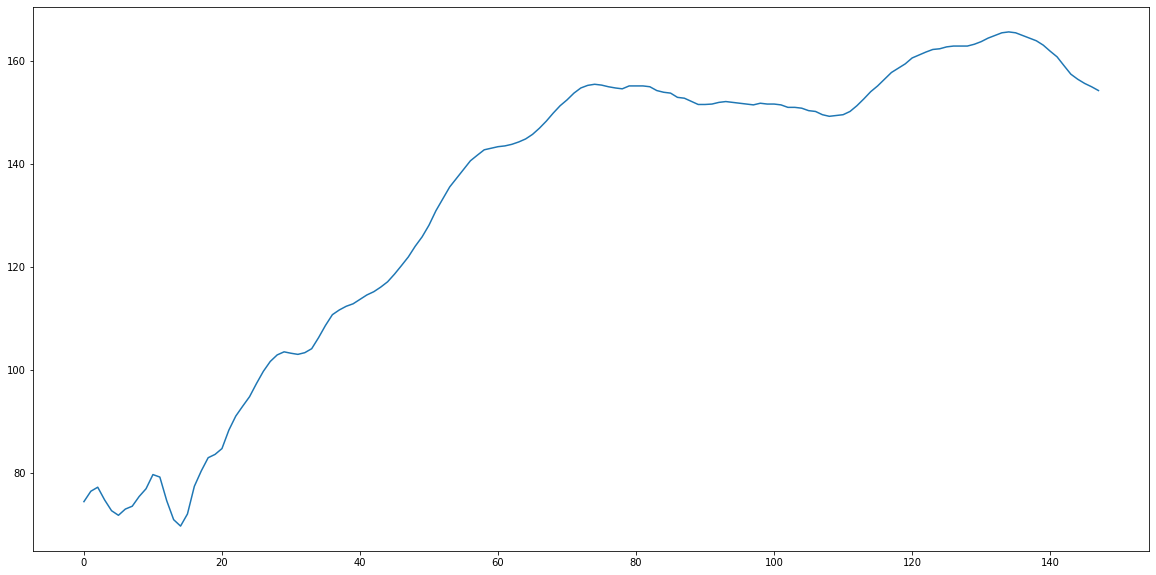

In [9]:
plt.figure(figsize=(20,10))
plt.plot(HR)

### Read all file mat

In [10]:
files = os.listdir('/content/'+path)
files

['DATA_02_TYPE02_BPMtrace.mat',
 'DATA_03_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02_BPMtrace.mat',
 'DATA_05_TYPE02_BPMtrace.mat',
 'DATA_06_TYPE02_BPMtrace.mat',
 'DATA_07_TYPE02_BPMtrace.mat',
 'DATA_08_TYPE02_BPMtrace.mat',
 'DATA_10_TYPE02_BPMtrace.mat',
 'DATA_09_TYPE02_BPMtrace.mat',
 'DATA_11_TYPE02_BPMtrace.mat',
 'DATA_01_TYPE01_BPMtrace.mat',
 'DATA_12_TYPE02_BPMtrace.mat',
 'DATA_04_TYPE02.mat',
 'DATA_05_TYPE02.mat',
 'DATA_01_TYPE01.mat',
 'DATA_06_TYPE02.mat',
 'DATA_03_TYPE02.mat',
 'DATA_11_TYPE02.mat',
 'DATA_12_TYPE02.mat',
 'DATA_07_TYPE02.mat',
 'DATA_02_TYPE02.mat',
 'DATA_08_TYPE02.mat',
 'DATA_10_TYPE02.mat',
 'DATA_09_TYPE02.mat',
 'TrainSubj1',
 'TrainSubj2',
 'TrainSubj3',
 'TrainSubj4',
 'TrainSubj5',
 'TrainSubj6',
 'TrainSubj7',
 'TrainSubj8',
 'TrainSubj9',
 'TrainSubj10',
 'TrainSubj11',
 'TrainSubj12',
 'dataset.pickle',
 'my_first_model.png',
 'resultsS0.pickle',
 'resultsS1.pickle']

## Make a set directory

In [ ]:
directory = ['TrainSubj'+str(i) for i in range(1,13)]
parent_path = os.path.abspath(os.getcwd()) # Get present path directory
for dir in directory:
  tagPath = os.path.join(parent_path, dir)
  os.makedirs(tagPath)

### Read into a pandas file 

In [13]:
import pandas as pd
from pathlib import Path

import scipy.io as sio
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#Xscaled = scaler.fit_transform(dfs[1])

def read_folder(mat_folder):
    ''' Input is a folder with csv files; return list of data frames.'''
    mat_folder = Path(mat_folder).absolute()
    mat_files = [f for f in mat_folder.iterdir() if f.name.endswith('mat') and not('BPMtrace' in f.name)]
    #data = scaler.fit_transform(sio.loadmat(csv_file)['sig'])
    # the assign() method adds a helper column rating
    dfs = [
        
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(rating_src = f'rating-{idx}')#assin a name rating to the column
        #pd.DataFrame(sio.loadmat(csv_file)['sig']).T.assign(Subject = f'{idx}')
        pd.DataFrame(scaler.fit_transform(pd.DataFrame(sio.loadmat(mat_file)['sig']).T)).assign(Subject = f'{idx-1}') # sclaing [0,1] and then convert to dataframe
        for idx, mat_file in enumerate(mat_files, 1)
    ]
    return mat_files, dfs

In [17]:
parent_path ='/content/'+path
mat_files, dfs = read_folder(parent_path)

In [18]:
dfs[11].iloc[:100]

,0,1,2,3,4,5,Subject
0,0.484355,0.526758,0.644993,0.708171,0.185008,0.656992,11
1,0.488527,0.526758,0.641743,0.708171,0.185008,0.659631,11
2,0.494368,0.524465,0.635891,0.712062,0.185008,0.656992,11
3,0.493951,0.520642,0.626788,0.712062,0.185008,0.659631,11
4,0.499374,0.512232,0.618986,0.712062,0.188198,0.656992,11
...,...,...,...,...,...,...,...
95,0.523154,0.508410,0.606632,0.638132,0.223285,0.680739,11
96,0.523154,0.497706,0.594278,0.626459,0.228070,0.688654,11
97,0.517730,0.490061,0.583875,0.634241,0.226475,0.688654,11
98,0.518565,0.479358,0.572172,0.630350,0.226475,0.688654,11


In [19]:
np.shape(dfs[0])[0]

37250

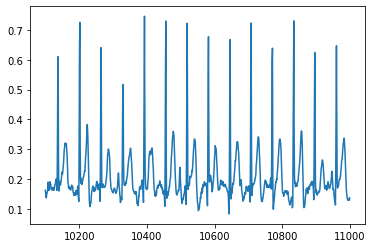

In [20]:
plt.plot(dfs[0][0].iloc[10100:11000])

### Split 12 subject data into N segment with length 1000

In [21]:
def segment(dataframe, dis=1000):
  a= []
  for df in dataframe:
    N = np.shape(df)[0]
    temp = [df.iloc[(i*dis):((i+1)*dis)] for i in range(0,int(N/dis))]
    for ele in temp:
      a.append(ele)
  return a



In [22]:
dfseg = segment(dfs)

(446, 1000, 7)


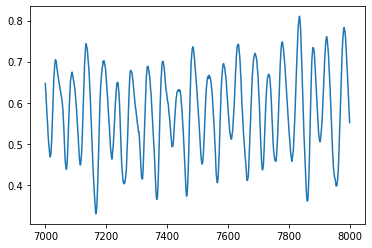

In [23]:
print(np.shape(dfseg))
plt.plot(dfseg[300][2])

###save datafile

In [20]:
import pickle
with open('dataset.pickle', 'wb') as f:
    pickle.dump([dfs, dfseg], f)

### Load data

In [21]:
with open('dataset.pickle', 'rb') as f:
    dfs, dfseg = pickle.load(f)

##Build Machine Learning Model 

In [24]:
import tensorflow as tf
dis=1000
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv1D(filters=32, kernel_size=30, kernel_initializer='lecun_normal', activation='selu', input_shape=(dis, 1)),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Dropout(0.5),
    # The second convolution
    tf.keras.layers.Conv1D(filters=32, kernel_size=50, kernel_initializer='lecun_normal', activation='selu'),
    tf.keras.layers.MaxPooling1D(4),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Flatten(),
    # The third convolution
    tf.keras.layers.LSTM(units = 128, return_sequences = True, activation='tanh', recurrent_dropout=0.1),
    # The fourth convolution
    tf.keras.layers.LSTM(units = 128, return_sequences = True, activation='tanh', recurrent_dropout=0.1),
    # 512 neuron hidden layer
    #tf.keras.layers.Dense(12, activation='softmax'),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(2, activation='selu'),
    tf.keras.layers.Flatten(), 
    #tf.keras.layers.Dense(48, activation='relu'),                                  
    #tf.keras.layers.Dense(2, activation='LeakyReLU'),#LeakyReLU
    tf.keras.layers.Dense(2, activation='softmax'),
  ])

In [25]:
OPTIMIZER = tf.keras.optimizers.RMSprop(learning_rate=0.0001) 
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy']) #categorical_crossentropy binary_crossentropy 'RMSprop'

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 971, 32)           992       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 242, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 242, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 193, 32)           51232     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 48, 32)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 48, 128)           8

In [27]:
int(dfseg[0]['Subject'][0])

0

##Build Machine Learning Model (style 2)

In [28]:
import keras
from keras.layers import Conv1D, Dense, MaxPooling1D, LSTM, Convolution1D, Reshape, Flatten
inputs = keras.Input(shape=(1000,1))
conv1 = Conv1D(filters=32, kernel_size=30, activation='selu')(inputs)
mxp1 = MaxPooling1D(4)(conv1)
conv2 = Conv1D(filters=32, kernel_size=50,activation='selu')(mxp1)
mxp2 = MaxPooling1D(4)(conv2)
lstm1 = LSTM(units = 128, return_sequences = True, activation='tanh', recurrent_dropout=0.1)(mxp2)
lstm2 = LSTM(units = 128, return_sequences = True, activation='tanh', recurrent_dropout=0.1)(lstm1)
dense1 = Dense(2,  activation='selu')(lstm2)
dense1 = Flatten()(dense1)
outputs = Dense(2, activation='softmax')(dense1)
#layer = tf.keras.layers.Softmax()
#outputs = layer(dense1)
#res = Reshape((96,), name='predictions')(dense1)

In [29]:
model = keras.Model(inputs=inputs, outputs=outputs, name="BiometricNet")

In [30]:
model.summary()

Model: "BiometricNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 971, 32)           992       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 242, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 193, 32)           51232     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 48, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 48, 128)           82432     
_________________________________________________________________
lstm_1 (LSTM)                (None, 48, 128)          

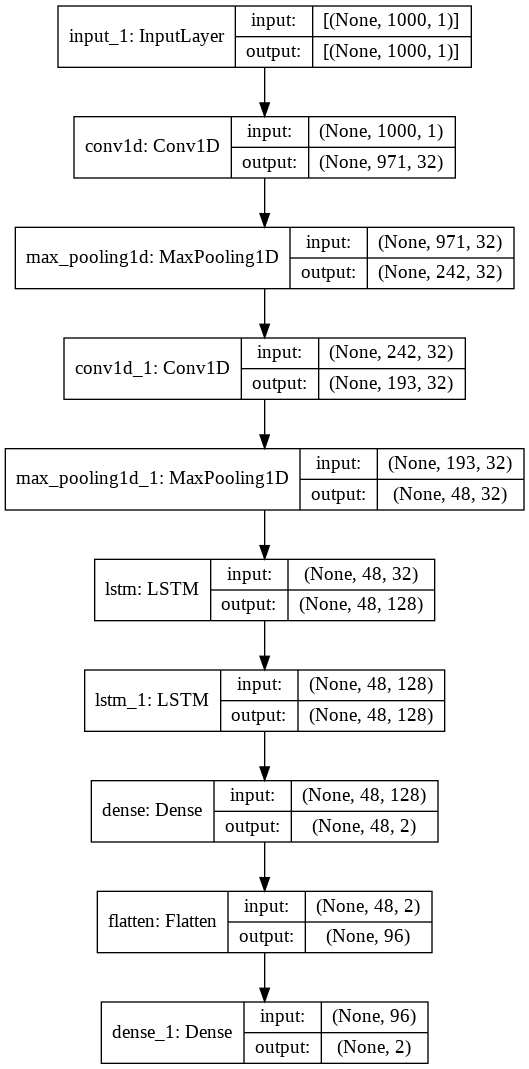

In [31]:
tf.keras.utils.plot_model(model, "my_first_model.png",show_shapes=True)

## Compile The Model

In [32]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),#from_logits=True
    optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
    metrics=["accuracy"],
)

In [33]:
inp = np.asarray([1., 0., 1.])
layer = tf.keras.layers.Softmax(axis=0)
layer(inp).numpy()

array([0.42231882, 0.15536241, 0.42231882], dtype=float32)

In [34]:
mask = np.asarray([False, True, False], dtype=bool)
layer(inp, mask).numpy()

array([0., 1., 0.], dtype=float32)

### Make X, y data

In [35]:
X = []
y = []
for seg in dfseg:
  X.append(seg[1].values) # PPG 1
  X.append(seg[2].values) # PPG 2
  y.append(int(seg['Subject'].values[0])) # Label for subject n PPG1
  y.append(int(seg['Subject'].values[0])) # Label for subject n PPG2


  #print(seg['Subject'][0])
X = np.array(X) 
y = np.asarray(y)

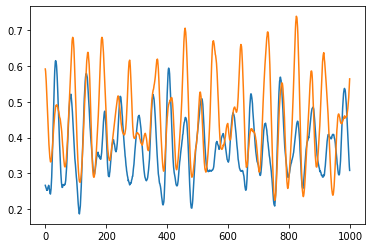

In [36]:
plt.plot(X[100])
plt.plot(X[101])

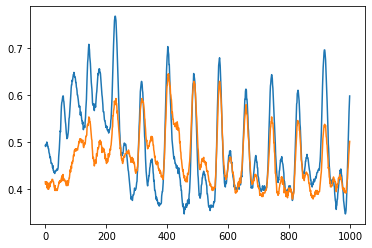

In [37]:
plt.plot(X[2])
plt.plot(X[3])

## Imbalance **dataset** resolution

### Install imblearn package

In [38]:
!pip install imblearn

### Oversamling imbalnced dataset

In [39]:
# Check the shape of dataset
print(np.shape(X), np.shape(y))
def group_dataset(y, key=0):
  if key not in y:
    assert "Error key"
    return 0
  else:
    z = np.array([0]*np.shape(y)[0])
    z[np.where(y==key)] = 1
    return z


(892, 1000) (892,)


### Check size and group data

In [62]:
z = group_dataset(y, key=3)


### Undersampling

In [63]:
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(sampling_strategy = 'all')
X_under, y_under = under_sample.fit_resample(X, z)
y_under = pd.Series(y_under)
y_under.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    76
0    76
dtype: int64

### Over-sampling

In [43]:
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 'all')
X_over, y_over = over_sample.fit_resample(X,z)
y_over = pd.Series(y_over)
y_over.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    818
0    818
dtype: int64

### SMOTE Technique

In [64]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smoted, y_smoted = oversample.fit_resample(X,z)
y_smoted = pd.Series(y_smoted)
y_smoted.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    816
0    816
dtype: int64

### Split data

In [65]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
#Using under-sampling
#X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=1)

#Using over-sampling
#X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=1)

#Using SMOTE
X_smoted, y_smoted = shuffle(X_smoted, y_smoted)
X_train, X_test, y_train, y_test = train_test_split(X_smoted, y_smoted, test_size=0.3, random_state=1)



X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#y_train = y_train.reshape((y_train.shape[0],1))
#y_test = y_test.reshape((y_test.shape[0],1))
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes= 2)

In [42]:
from sklearn.preprocessing import LabelEncoder

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_under)
encoded_Y = encoder.transform(y_under)

In [54]:
np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test)

((1145, 1000, 1), (1145, 2), (491, 1000, 1), (491, 2))

In [135]:
np.shape(X_under)

(148, 1000)

### Check group of Data

In [44]:
pd.DataFrame(y_train).groupby(0)[0].count()

0
0.0    573
1.0    572
Name: 0, dtype: int64

### Run Model



In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=25, verbose=1)

### Develop baseline a Neural Network Model

In [46]:
import pandas
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Build the model with 5-fold, shuffling and cross validation

In [ ]:
import keras
from keras.layers import Conv1D, Dense, MaxPooling1D, LSTM, Convolution1D, Reshape, Flatten
### define the model
def baseline_model():
  #create model
  inputs = keras.Input(shape=(1000,1))
  conv1 = Conv1D(filters=32, kernel_size=30, activation='selu')(inputs)
  mxp1 = MaxPooling1D(4)(conv1)
  conv2 = Conv1D(filters=32, kernel_size=50,activation='selu')(mxp1)
  mxp2 = MaxPooling1D(4)(conv2)
  lstm1 = LSTM(units = 128, return_sequences = True, activation='tanh', recurrent_dropout=0.1)(mxp2)
  lstm2 = LSTM(units = 128, return_sequences = True, activation='tanh', recurrent_dropout=0.1)(lstm1)
  dense1 = Dense(2,  activation='selu')(lstm2)
  dense1 = Flatten()(dense1)
  outputs = Dense(2, activation='softmax')(dense1)
  model = keras.Model(inputs=inputs, outputs=outputs, name="BiometricNet")
  model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.RMSprop(learning_rate=0.001), metrics=["accuracy"])
  return model




In [70]:
model = baseline_model()
estimator = KerasClassifier(build_fn= baseline_model, epochs=100, batch_size=25, verbose=1)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100
37/37 [==============================] - 19s 301ms/step - loss: 0.8338 - accuracy: 0.5079
Epoch 2/100
37/37 [==============================] - 11s 298ms/step - loss: 0.6767 - accuracy: 0.5663
Epoch 3/100
37/37 [==============================] - 11s 300ms/step - loss: 0.6586 - accuracy: 0.6183
Epoch 4/100
37/37 [==============================] - 11s 299ms/step - loss: 0.6064 - accuracy: 0.7200
Epoch 5/100
37/37 [==============================] - 11s 298ms/step - loss: 0.5801 - accuracy: 0.7510
Epoch 6/100
37/37 [==============================] - 11s 299ms/step - loss: 0.6652 - accuracy: 0.7363
Epoch 7/100
37/37 [==============================] - 11s 301ms/step - loss: 0.7043 - accuracy: 0.7041
Epoch 8/100
37/37 [==============================] - 11s 307ms/step - loss: 0.4240 - accuracy: 0.8209
Epoch 9/100
37/37 [==============================] - 11s 302ms/step - loss: 0.5400 - accuracy: 0.8064
Epoch 10/100
37/37 [==============================] - 11s 298ms/step - loss: 0.406

In [ ]:
model.summary()

In [48]:
Results_All = []

In [60]:

Results_All.append(results)

In [61]:
np.mean(Results_All[2]), np.std(Results_All[2])


(0.9685589432716369, 0.013919098118108118)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff3e052c9d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff3e120f9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff3e02b4d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff3e02b4550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff3e052c150>,
  <matplotlib.lines.Line2D at 0x7ff3e052ca10>]}

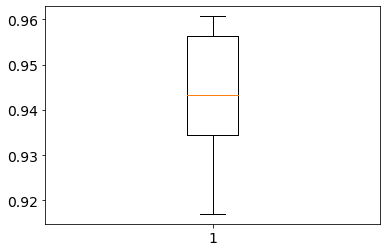

In [72]:
plt.boxplot(results)

#### Save the data

In [49]:
import pickle
with open('resultsS2.pickle', 'wb') as f:
    pickle.dump([results], f)

In [54]:
import pickle
with open('resultsS0.pickle', 'rb') as f:
    result1 = pickle.load(f)
    
    

In [56]:
np.mean(result1),np.std(result1)

(0.9633187532424927, 0.007095234699712329)

NameError: ignored

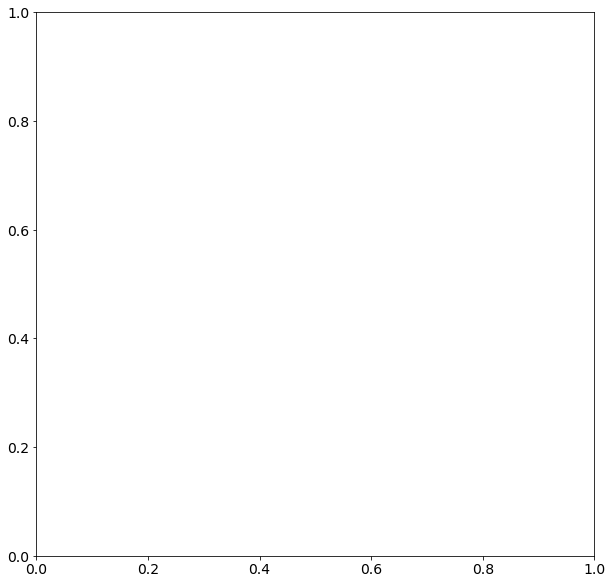

In [57]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
#plt.rcParams.update({'font.size': 22})
SMALL_SIZE = 14
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#ax.yaxis.set_major_locator(MaxNLocator(5)) 
ax.xaxis.set_major_locator(MaxNLocator(6))
# summarize history for accuracy
ax.plot(history.history['accuracy'],'-')
ax.plot(history.history['val_accuracy'],'-')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ax.legend(['train', 'test'], loc='lower right')
plt.show()